In [1]:
import pandas_datareader as pdr
import pandas as pd
import datetime as datetime

In [2]:
df_tesla = pdr.get_data_yahoo('TSLA')
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-05,61.709999,59.360001,59.599998,61.669998,40886500.0,61.669998
2017-05-08,62.757999,61.164001,62.180000,61.438000,35032500.0,61.438000
2017-05-09,64.398003,61.820000,61.875999,64.251999,48382500.0,64.251999
2017-05-10,65.099998,63.624001,64.311996,65.043999,28708000.0,65.043999
2017-05-11,65.199997,63.919998,64.680000,64.620003,23769000.0,64.620003
...,...,...,...,...,...,...
2022-04-29,934.400024,870.000000,902.250000,870.760010,29313400.0,870.760010
2022-05-02,906.359985,848.030029,860.770020,902.940002,25260500.0,902.940002
2022-05-03,924.080017,888.590027,903.179993,909.250000,21236500.0,909.250000


## Simple Moving Avg

In [3]:
# Smoothing of graph

<AxesSubplot:xlabel='Date'>

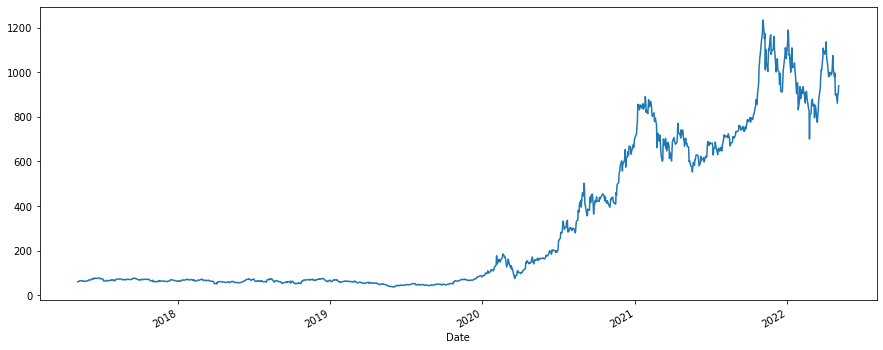

In [5]:
df_tesla['Open'].plot(figsize = (15,6))

In [6]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window = 10, min_periods = 1).mean()

<AxesSubplot:xlabel='Date'>

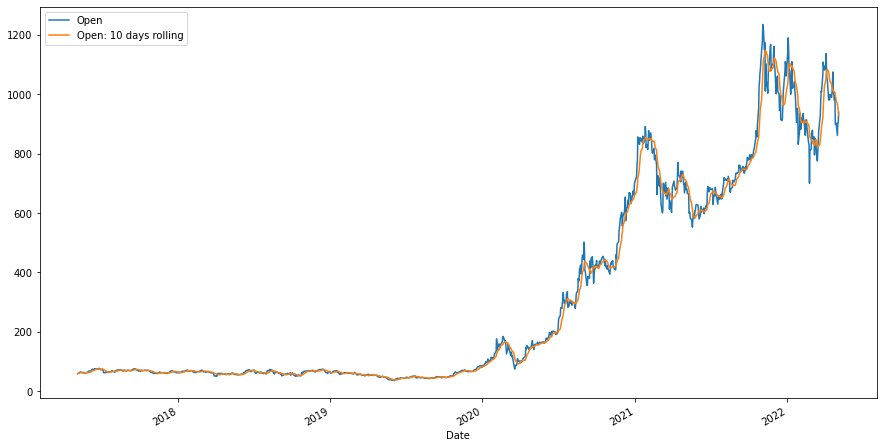

In [11]:
df_tesla[['Open', 'Open: 10 days rolling']].plot(figsize = (15,8))

### Disadvantages
- Similar importance to all the data points, more weight should be there for recent data
- forcasting should be more dependent on recent data

## Cummulative Moving Average

<AxesSubplot:xlabel='Date'>

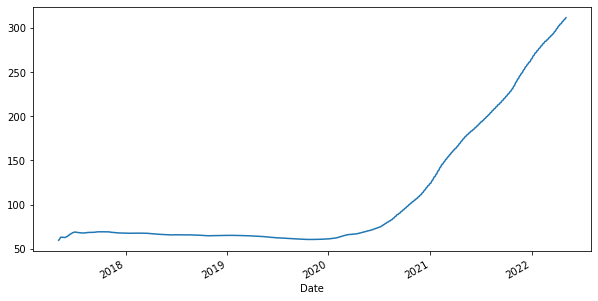

In [13]:
df_tesla['Open'].expanding().mean().plot(figsize = (10,5))

## EWMA - Exponential Weighted Moving Average


- Focus more on recent data
#### EMA
- Formula: ((close- Prev_EMA)*multiplier)+Prev_EMA
- Multiplier: 2/(rolling_window_size + 1)
#### EWMA
- EWMA(t) = a*x(t) + (1-a)EWMA(t-1)
- a: weight (To prevent lags)

In [15]:
## EMA Tesla Shares
## Let's smoothing factor - 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha = 0.1, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

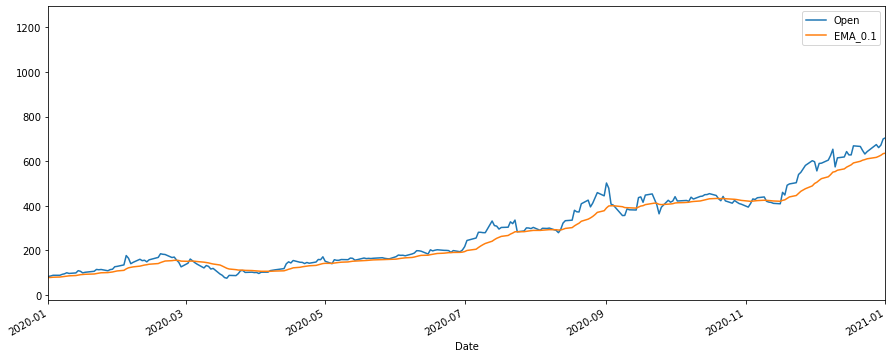

In [16]:
df_tesla[['Open', 'EMA_0.1']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

In [17]:
# Smoothing factor (alpha) = 0.3
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha = 0.3, adjust=False).mean()

<AxesSubplot:xlabel='Date'>

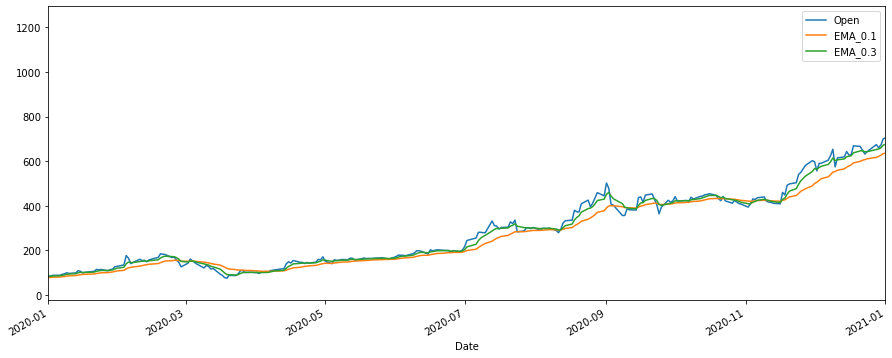

In [18]:
df_tesla[['Open', 'EMA_0.1', 'EMA_0.3']].plot(xlim=['2020-01-01', '2021-01-01'], figsize=(15,6))

In [19]:
## EWMA 
## Span is used to get the EWMA
df_tesla['EMA_5days'] = df_tesla['Open'].ewm(span=5).mean()

<AxesSubplot:xlabel='Date'>

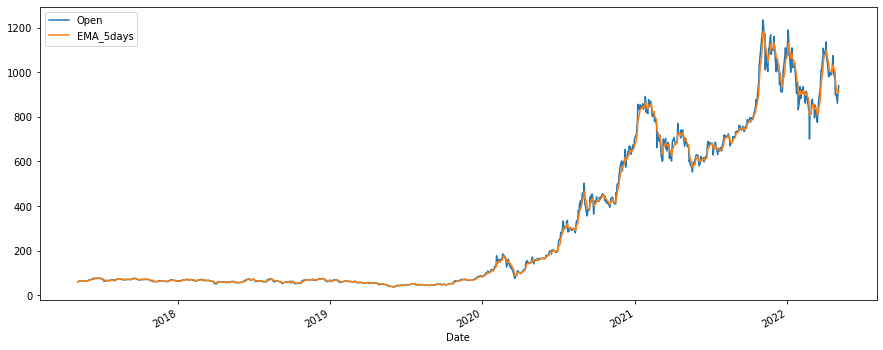

In [20]:
df_tesla[['Open', 'EMA_5days']].plot(figsize=(15,6))